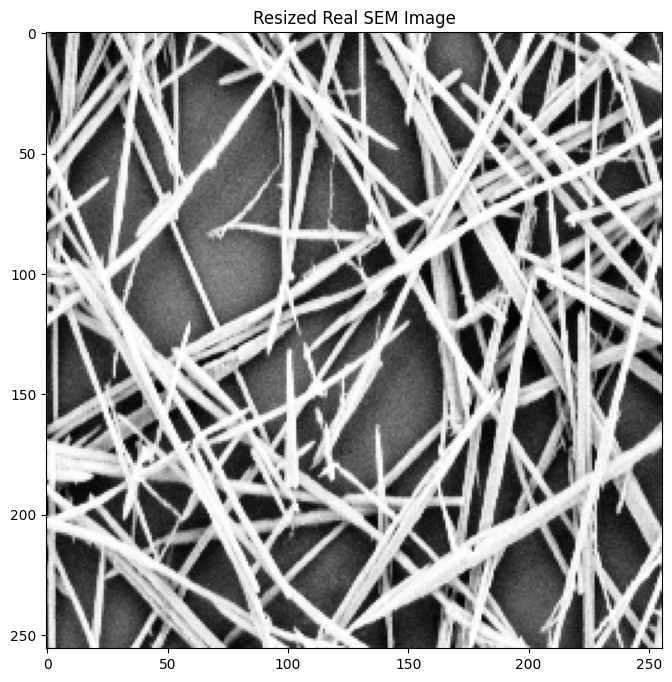

In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load a real SEM image
real_sem_image_path = "Cu2O 8mM09.tif"
real_image = cv2.imread(real_sem_image_path, cv2.IMREAD_GRAYSCALE)

# Crop the bottom of the image (optional)
def crop_image(image, crop_fraction=0.2):
    crop_height = int(image.shape[0] * (1 - crop_fraction))
    return image[:crop_height, :]

# Resize the image to the model's expected input size
def resize_image(image, target_size=(256, 256)):
    return cv2.resize(image, target_size)

# Crop and resize the real SEM image
crop_fraction = 0.2
cropped_image = crop_image(real_image, crop_fraction)
resized_image = resize_image(cropped_image, target_size=(256, 256))

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image, cmap='gray')
plt.title("Resized Real SEM Image")
plt.show()


# New Section

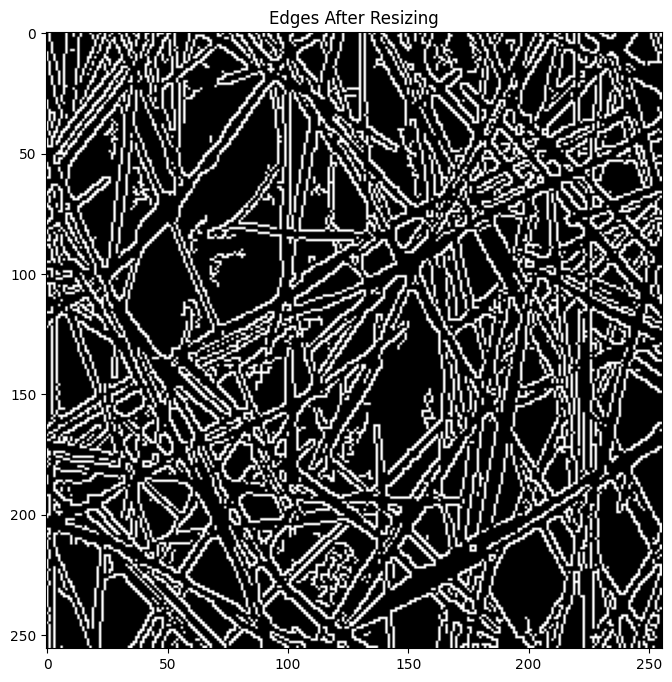

Input edges shape for the model: (1, 256, 256, 1)


In [ ]:
# Apply edge detection to the resized image
edges = cv2.Canny(resized_image, 50, 150)

# Display edges
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap='gray')
plt.title("Edges After Resizing")
plt.show()

# Prepare the edges for model input
input_edges = edges[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions
print("Input edges shape for the model:", input_edges.shape)


In [ ]:
# Load the trained model
cnn_model = tf.keras.models.load_model("use the model train here")

# Predict refined lines
refined_lines = cnn_model.predict(input_edges)  # Predict rho and theta
print("Predicted Refined Line Parameters (rho, theta):", refined_lines)


1/1 [==============================] - 0s 135ms/step
Predicted Refined Line Parameters (rho, theta): [[115.74422  -26.585545]]


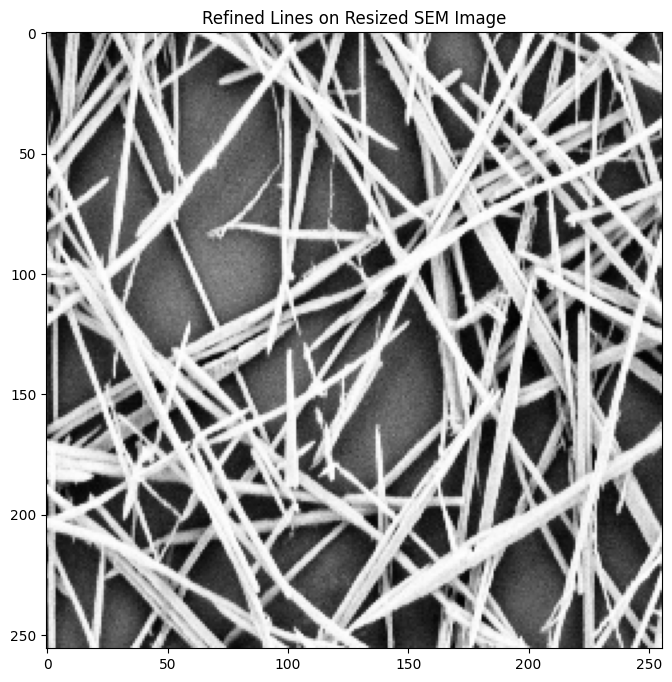

In [ ]:
# Draw refined lines on the resized image
refined_output_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2BGR)
for rho, theta in refined_lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(refined_output_image, (x1, y1), (x2, y2), (0, 0, 255), 1)

# Display the refined lines
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(refined_output_image, cv2.COLOR_BGR2RGB))
plt.title("Refined Lines on Resized SEM Image")
plt.show()
